# Mortalidad Infantil
## Datos de Mortalidad infantil en el Perú por cada 1000 (Banco Mundial)
Fuente: https://datos.bancomundial.org/indicador/SH.DYN.MORT?locations=PE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

url = "https://api.worldbank.org/v2/sources/2/country/per/series/SP.DYN.IMRT.IN?format=json"
response = requests.get(url)

data = response.json()

source_data = data["source"]["data"]
year_value_pairs = []
for entry in source_data:
    for var in entry["variable"]:
        if var["concept"] == "Time":
            year = var["value"]
            break
    value = entry["value"]
    year_value_pairs.append((year, value))
df= pd.DataFrame(year_value_pairs, columns=["Año", "Valor"]).sort_values(by="Año", ascending = True).reset_index(drop=True).dropna()
        
print(df.describe())

           Valor
count  49.000000
mean   42.632653
std    28.468092
min    11.700000
25%    15.600000
50%    34.100000
75%    68.100000
max    94.300000


Text(0.5, 1.0, 'Tasa de Mortalidad infantil en el Perú')

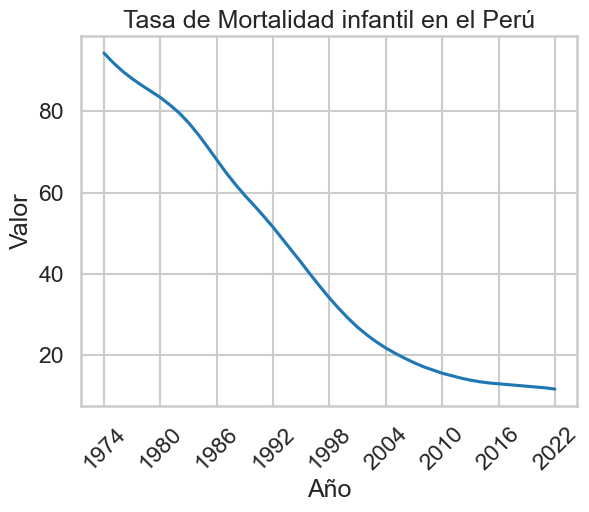

In [4]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Año', y='Valor')


xticks = df['Año'][::6]  # Definir etiquetas del eje x
plt.xticks(xticks, rotation=45)  # Rotar las etiquetas

# Ajustar el título y etiquetas
plt.title('Tasa de Mortalidad infantil en el Perú', fontsize=18)

## Datos de Mortalidad infantil en el Perú por cada 1000 (childmortality.org)
compilado: https://sdmx.data.unicef.org/ws/public/sdmxapi/rest/data/UNICEF,CME_DF_2021_WQ,1.0/PER.MRY0._T._T.../

Fuente: https://childmortality.org/all-cause-mortality/data?reportType=tools&refArea=PER&indicator=MRY0T&sex=_T

### TMI  en Perú

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from bs4 import BeautifulSoup

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install())) # Configuración de Selenium para usar Chrome

url = "https://childmortality.org/all-cause-mortality/data/estimates?indicator=MRY0&refArea=PER"
driver.get(url) # Abre Chrome y accede a la url

wait = WebDriverWait(driver, 20) # Tiempo de espera para acceder a la tabla (máximo 10 segundos)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

html = driver.page_source # Extrae el HTML cuandola tabla está disponible

soup = BeautifulSoup(html, 'html.parser') # BeautifulSoup para analizar el HTML

table = soup.find('table', class_='MuiTable-root') # Encuentra la tabla en el HTML

headers = [header.text.strip() for header in table.find_all('th')] # Extrae los encabezados de la tabla

rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Crea un DataFrame con los datos obtenidos
df_mi = pd.DataFrame(rows, columns=headers)
df_mi= df_mi.sort_values("Year", ascending= True)
# Cierra el navegador
driver.quit()

df_mi['Estimate']=df_mi['Estimate'].astype("float")
df_mi =df_mi.reset_index(drop=True)
df_mi["Year"]=df_mi["Year"].astype("int")
df_mi

,Year,Estimate,Lower bound,Upper bound
0,1952,175.64,153.44,201.74
1,1953,168.76,149.92,189.66
2,1954,162.32,146.02,179.71
3,1955,156.36,141.87,171.61
4,1956,151.18,138.04,164.83
...,...,...,...,...
66,2018,12.60,10.99,14.49
67,2019,12.41,10.56,14.75
68,2020,12.22,10.13,14.99
69,2021,11.98,9.66,15.17


pip install requests beautifulsoup4 pandas


pip install selenium webdriver-manager pandas


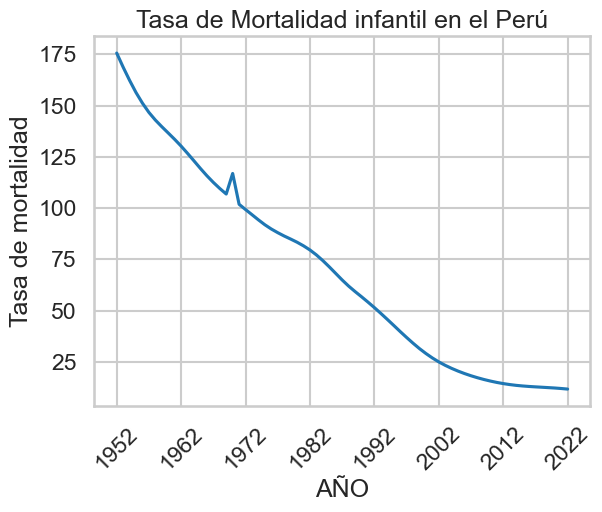

In [10]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.lineplot(data=df_mi, x='Year', y='Estimate')
plt.xlabel("AÑO")
xticks = df_mi['Year'][::10]
plt.title('Tasa de Mortalidad infantil en el Perú', fontsize=18)
plt.ylabel("Tasa de mortalidad")
plt.xticks(xticks, rotation=45)

plt.show()

### TMI femenina

In [12]:
# Configura Selenium para usar Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abre la página web
url = "https://childmortality.org/all-cause-mortality/data/estimates?indicator=MRY0&refArea=PER&sex=F"
driver.get(url)

# Espera hasta que la tabla esté disponible (máximo 10 segundos)
wait = WebDriverWait(driver, 20)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

# Extrae el HTML una vez que la tabla está disponible
html = driver.page_source

# Usa BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html, 'html.parser')

# Encuentra la tabla en el HTML
table = soup.find('table', class_='MuiTable-root')

# Extrae los encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extrae las filas de la tabla
rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Crea un DataFrame con los datos obtenidos
df_mi_f = pd.DataFrame(rows, columns=headers)
df_mi_f= df_mi_f.sort_values("Year", ascending= True)
# Cierra el navegador
driver.quit()
df_mi_f['Estimate']=df_mi_f['Estimate'].astype("float")
df_mi_f

,Year,Estimate,Lower bound,Upper bound
70,1952,163.74,142.61,189.24
69,1953,157.24,138.94,178.18
68,1954,151.15,135.17,168.79
67,1955,145.51,131.16,161.3
66,1956,140.55,127.27,154.72
...,...,...,...,...
4,2018,11.32,9.81,13.13
3,2019,11.18,9.43,13.33
2,2020,10.99,9.05,13.56
1,2021,10.77,8.63,13.74


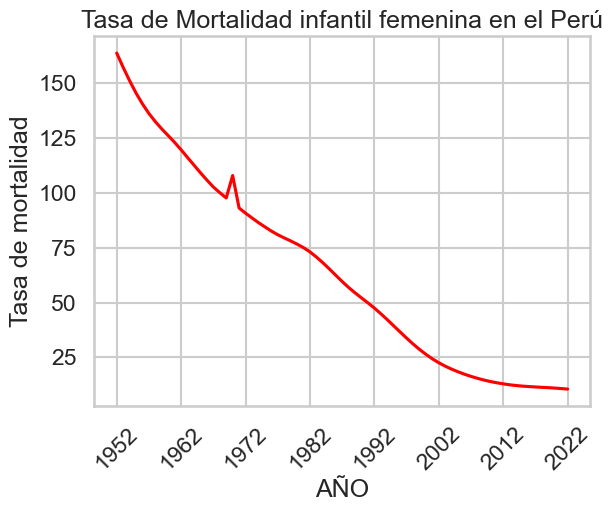

In [13]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.lineplot(data=df_mi_f, x='Year', y='Estimate',color='red')
plt.xlabel("AÑO")
xticks = df_mi_f['Year'][::10]
plt.title('Tasa de Mortalidad infantil femenina en el Perú', fontsize=18)
plt.ylabel("Tasa de mortalidad")
plt.xticks(xticks, rotation=45)

plt.show()

### TMI masculina

In [49]:
# Configura Selenium para usar Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abre la página web
url = "https://childmortality.org/all-cause-mortality/data/estimates?indicator=MRY0&refArea=PER&sex=M"
driver.get(url)

# Espera hasta que la tabla esté disponible (máximo 10 segundos)
wait = WebDriverWait(driver, 25)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

# Extrae el HTML una vez que la tabla está disponible
html = driver.page_source

# Usa BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html, 'html.parser')

# Encuentra la tabla en el HTML
table = soup.find('table', class_='MuiTable-root')

# Extrae los encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extrae las filas de la tabla
rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Crea un DataFrame con los datos obtenidos
df_mi_m = pd.DataFrame(rows, columns=headers)
df_mi_m= df_mi_m.sort_values("Year", ascending= True)
# Cierra el navegador
driver.quit()
df_mi_m['Estimate']=df_mi_m['Estimate'].astype("float")
df_mi_m

,Year,Estimate,Lower bound,Upper bound
70,1952,186.89,162.23,215.89
69,1953,179.64,158.64,203.03
68,1954,172.87,154.58,192.55
67,1955,166.63,150.39,184.13
66,1956,161.25,146.45,177.06
...,...,...,...,...
4,2018,13.80,11.99,15.94
3,2019,13.59,11.53,16.19
2,2020,13.37,11.05,16.46
1,2021,13.11,10.55,16.69


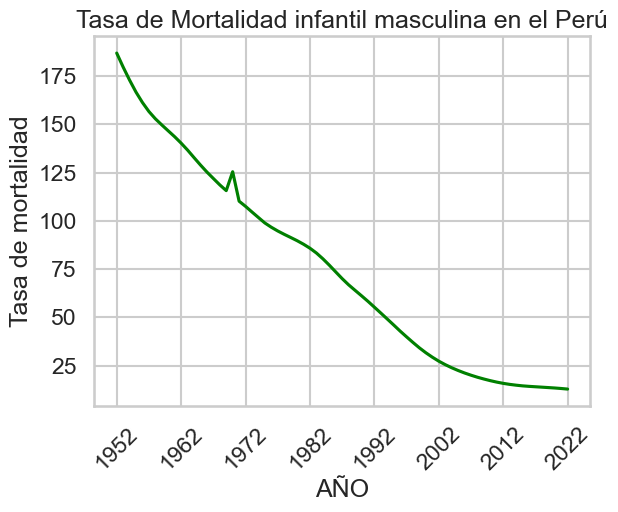

In [50]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.lineplot(data=df_mi_m, x='Year', y='Estimate', color='green')
plt.xlabel("AÑO")
xticks = df_mi_m['Year'][::10]
plt.title('Tasa de Mortalidad infantil masculina en el Perú', fontsize=18)
plt.ylabel("Tasa de mortalidad")
plt.xticks(xticks, rotation=45)

plt.show()

In [51]:
df_mi_m.loc[:, 'Sexo'] = 'Masculino'
df_mi_f.loc[:, 'Sexo'] = 'Femenino'
dft_mi=pd.concat([df_mi_m,df_mi_f]).reset_index(drop=True)
dft_mi

,Year,Estimate,Lower bound,Upper bound,Sexo
0,1952,186.89,162.23,215.89,Masculino
1,1953,179.64,158.64,203.03,Masculino
2,1954,172.87,154.58,192.55,Masculino
3,1955,166.63,150.39,184.13,Masculino
4,1956,161.25,146.45,177.06,Masculino
...,...,...,...,...,...
137,2018,11.32,9.81,13.13,Femenino
138,2019,11.18,9.43,13.33,Femenino
139,2020,10.99,9.05,13.56,Femenino
140,2021,10.77,8.63,13.74,Femenino


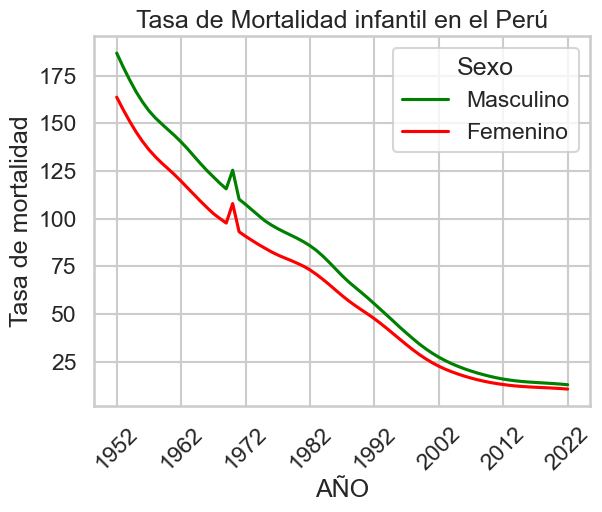

In [52]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.color_palette("bright")
sns.lineplot(data=dft_mi, x='Year', y='Estimate', hue='Sexo', palette={'Masculino': 'green', 'Femenino': 'red'})
plt.xlabel("AÑO")
xticks = df_mi_m['Year'][::10]
plt.title('Tasa de Mortalidad infantil en el Perú', fontsize=18)
plt.ylabel("Tasa de mortalidad")
plt.xticks(xticks, rotation=45)

plt.show()

## Cantidad de nacimientos en el Perú en los últimos años
Datos del Instituto Nacional de Estdística e Informática (INEI)
Fuente: https://www.inei.gob.pe/estadisticas/indice-tematico/sociales/

### Por departamentos

In [55]:
import pandas as pd

url = 'https://www.inei.gob.pe/media/MenuRecursivo/indices_tematicos/e-vitales_01-ok_1.xlsx'

df3 = pd.read_excel(url, sheet_name=0, skiprows=2, usecols='A:I', nrows=31).dropna().drop([2,17]).reset_index(drop=True)

df3["Res"]=df3["Departamento de inscripción"].str[:8]
df3

,Departamento de inscripción,2015,2016,2017,2018,2019,2020,2021,2022,Res
0,Amazonas,11096.0,11282.0,10153.0,10067.0,9815.0,5382.0,8751.0,8401.0,Amazonas
1,Áncash,21417.0,20716.0,20634.0,20010.0,19339.0,15939.0,18500.0,18163.0,Áncash
2,Apurímac,8536.0,8027.0,7983.0,7692.0,7347.0,6150.0,7475.0,7334.0,Apurímac
3,Arequipa,25620.0,25941.0,24974.0,24705.0,23412.0,17834.0,19361.0,20364.0,Arequipa
4,Ayacucho,13464.0,13274.0,13402.0,12757.0,12469.0,9213.0,12275.0,11017.0,Ayacucho
5,Cajamarca,29942.0,28575.0,27689.0,26537.0,25364.0,20304.0,26554.0,25183.0,Cajamarc
6,Prov. Const. del Callao,17890.0,16419.0,16031.0,18406.0,16308.0,10330.0,10728.0,11552.0,Prov. Co
7,Cusco,27093.0,26627.0,25742.0,25043.0,23814.0,18637.0,21640.0,20892.0,Cusco
8,Huancavelica,7335.0,6854.0,6799.0,6434.0,6098.0,4000.0,6040.0,5223.0,Huancave
9,Huánuco,17180.0,16392.0,17038.0,16033.0,15666.0,12549.0,15969.0,15147.0,Huánuco


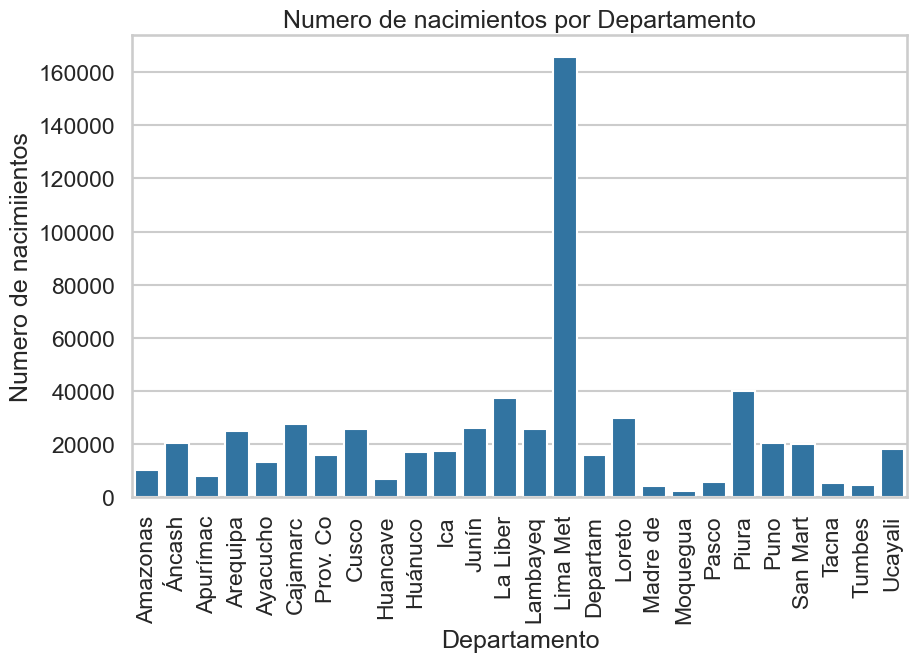

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df3,x="Res",y=2017)
plt.xlabel("Departamento")
plt.ylabel("Numero de nacimiientos")
plt.title("Numero de nacimientos por Departamento")
plt.xticks(rotation=90)
plt.show()

### Total por año

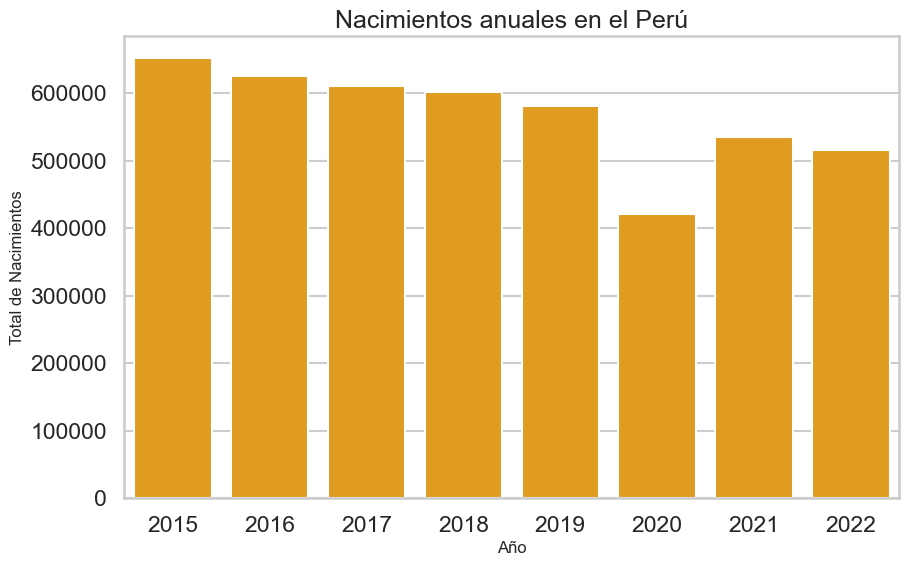

In [58]:
total_fila = df3.iloc[:, 1:9].sum()

df3_totales = pd.DataFrame({
    'Año': list(df3.columns[1:9]),
    'Total': total_fila.values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Total', data=df3_totales,color="orange")

plt.title('Nacimientos anuales en el Perú', fontsize=18)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Nacimientos', fontsize=12)

plt.show()

## Número de muertes infantiles

In [60]:
df_num=pd.DataFrame({
    "Año": df3_totales["Año"],
    "Numero de muertes": df3_totales["Total"]*(df_mi[df_mi["Year"]>=2015]["Estimate"].reset_index(drop=True))/1000

})
df_num["Numero de muertes"]=df_num["Numero de muertes"].round(2)
df_num

,Año,Numero de muertes
0,2015,8620.43
1,2016,8128.84
2,2017,7799.84
3,2018,7582.44
4,2019,7210.48
5,2020,5145.79
6,2021,6414.49
7,2022,6040.65


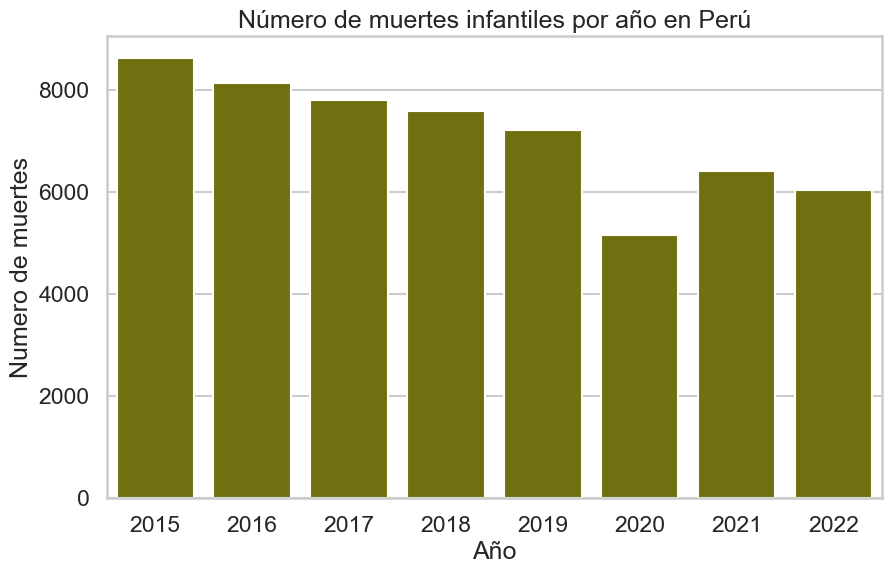

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(data= df_num, x="Año", y="Numero de muertes",color="olive")
plt.title("Número de muertes infantiles por año en Perú")
plt.show()


## Tasa de mortalidad infantil por departamentos en Perú
Fuente: https://www.inei.gob.pe/media/MenuRecursivo/publicaciones_digitales/Est/Lib1865/libro.pdf

Los datos de este pdf son resultado del censo realizado en 2017, última vez que se publicó la tasa de mortalidad infantil por departamentos (página 51)

In [63]:
import pdfplumber
import pandas as pd
import re

# Ruta del PDF (puedes descargarlo o usar la URL)
pdf_url = "https://www.inei.gob.pe/media/MenuRecursivo/publicaciones_digitales/Est/Lib1865/libro.pdf"

# Descargar el PDF desde la URL
import requests
from io import BytesIO

response = requests.get(pdf_url)
pdf_file = BytesIO(response.content)

# Abrir el PDF usando pdfplumber
with pdfplumber.open(pdf_file) as pdf:
    # Seleccionar la página 52 (recordando que en python los índices empiezan en 0, por lo tanto es la página 51)
    page = pdf.pages[50]
    
    # Extraer el texto de la página
    text = page.extract_text()

# Limpiar el texto para obtener solo la tabla que comienza con "TOTAL" y termina con "UCAYALI"
start = text.find("TOTAL")
end = text.find("UCAYALI") + len("UCAYALI") + 15  # Ajustamos para incluir el final de la tabla
table_text = text[start:end]

# Imprimir la tabla extraída para verificar
#print(table_text)

# Reemplazar comas con puntos para tener números flotantes
table_text = table_text.replace(",", ".")

# Dividir el texto en líneas
lines = table_text.strip().split("\n")

# Usar una expresión regular para separar el nombre del departamento de los valores numéricos
data_list = []
for line in lines:
    # Separar usando una expresión regular que captura el nombre del departamento y los tres valores numéricos
    match = re.match(r"([A-Za-zÁÉÍÓÚÑ\s/\d\.]+)\s+([\d\.]+)\s+([\d\.]+)\s+([\d\.]+)", line)
    if match:
        data_list.append([match.group(1).strip(), match.group(2), match.group(3), match.group(4)])

# Crear un DataFrame a partir de la lista procesada
df4 = pd.DataFrame(data_list, columns=['Departamento', 'Tasa de Mortalidad', 'Valor Mínimo', 'Valor Máximo'])

# Convertir las columnas numéricas a float
df4[['Tasa de Mortalidad', 'Valor Mínimo', 'Valor Máximo']] = df4[['Tasa de Mortalidad', 'Valor Mínimo', 'Valor Máximo']].astype(float)
df4=df4.drop(0)

df4.iloc[20,0]="CALLAO"
df4.iloc[14,0]="LIMA PROV"
df4=df4.sort_values("Departamento").reset_index(drop=True)
df4['Siglas'] = df4['Departamento'].str[:7]
# Mostrar el DataFrame resultante
df4

,Departamento,Tasa de Mortalidad,Valor Mínimo,Valor Máximo,Siglas
0,AMAZONAS,15.2,12.9,21.5,AMAZONA
1,ANCASH,12.1,9.3,19.0,ANCASH
2,APURÍMAC,15.9,13.5,20.2,APURÍMA
3,AREQUIPA,9.9,8.9,22.3,AREQUIP
4,AYACUCHO,13.9,12.9,18.4,AYACUCH
5,CAJAMARCA,14.0,12.8,16.3,CAJAMAR
6,CALLAO,9.2,8.9,9.4,CALLAO
7,CUSCO,15.5,13.1,29.8,CUSCO
8,HUANCAVELICA,15.5,13.1,18.7,HUANCAV
9,HUÁNUCO,15.0,13.8,20.7,HUÁNUCO


### Diagrama de barras de la tasa de mortalidad por departamento

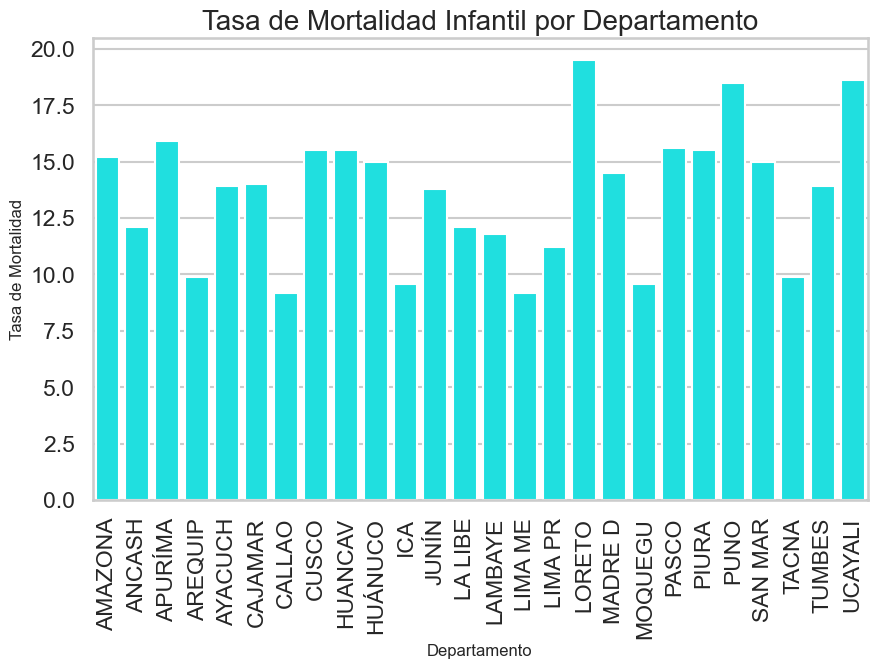

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Siglas", y="Tasa de Mortalidad", data=df4, color="aqua")
plt.title('Tasa de Mortalidad Infantil por Departamento', fontsize=20)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Tasa de Mortalidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

pip install geopandas matplotlib folium pandas

### Mapa de calor de tasa de mortalidad por departamentos

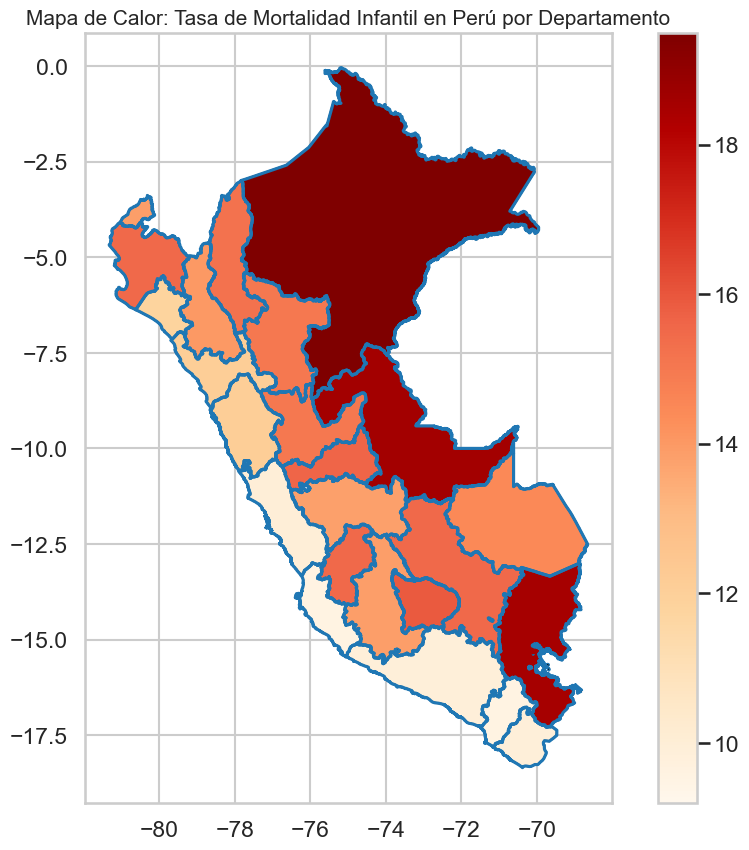

In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ruta relativa al archivo .shp dentro de la carpeta donde está el cuaderno Jupyter
shapefile_dir = "shapefile"  # Nombre de la subcarpeta donde están todos los archivos del shapefile
shapefile_name = "Departamental INEI 2023 geogpsperu SuyoPomalia.shp"
shapefile_path = os.path.join(shapefile_dir, shapefile_name)

# Leer el archivo shapefile
gdf = gpd.read_file(shapefile_path)

d_exp2 = df4
d_exp2=d_exp2.drop(15)
d_exp2.iloc[14,0]="LIMA"
d_exp2.iloc[14,1]=10
d_exp2=d_exp2.reset_index(drop=True)
d_exp2.iloc[2,0] , d_exp2.iloc[9,0] , d_exp2.iloc[11,0] = "APURIMAC", "HUANUCO", "JUNIN"

# Unir el dataframe con las tasas de mortalidad con el geodataframe que contiene los límites geográficos
gdf = gdf.merge(d_exp2, how='left', left_on='DEPARTAMEN', right_on='Departamento')

# Graficar el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.boundary.plot(ax=ax)  # Dibujar fronteras de los departamentos
gdf.plot(column='Tasa de Mortalidad', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

# Añadir título
ax.set_title('Mapa de Calor: Tasa de Mortalidad Infantil en Perú por Departamento', fontdict={'fontsize': 15})
plt.show()


## Número de muertes por departamento

In [70]:
df_ndep=pd.DataFrame(df4["Departamento"])
df_ndep["Numero de muertes"] = df4["Tasa de Mortalidad"]*df3[2017]/1000
df_ndep["RES"]=df_ndep["Departamento"].str[:8]
df_ndep

,Departamento,Numero de muertes,RES
0,AMAZONAS,154.3256,AMAZONAS
1,ANCASH,249.6714,ANCASH
2,APURÍMAC,126.9297,APURÍMAC
3,AREQUIPA,247.2426,AREQUIPA
4,AYACUCHO,186.2878,AYACUCHO
5,CAJAMARCA,387.6460,CAJAMARC
6,CALLAO,147.4852,CALLAO
7,CUSCO,399.0010,CUSCO
8,HUANCAVELICA,105.3845,HUANCAVE
9,HUÁNUCO,255.5700,HUÁNUCO


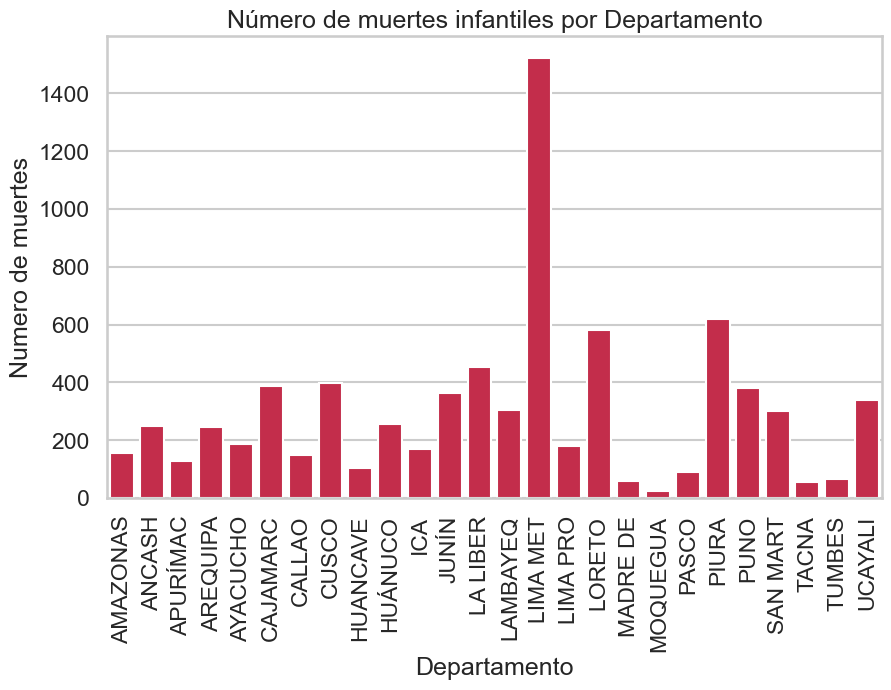

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ndep,x="RES",y="Numero de muertes",color='crimson')
plt.xlabel("Departamento")
plt.ylabel("Numero de muertes")
plt.title("Número de muertes infantiles por Departamento")
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

## Causas de mortalidad infantil por años
Fuente: https://childmortality.org/causes-of-death/data?indicator=MRY0&refArea=PER&sex=_T&age=M0&type=FRACTION&d_refArea=PER&ifex=CAUSE_OF_DEATH&cause=ASPHY_TRAUMA&causes=ASPHY_TRAUMA&causes=MENINGITIS_ENC&causes=PREMATURITY&year=2021

### Año 2021

In [74]:
from googletrans import Translator

# Configura Selenium para usar Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abre la página web
url = "https://childmortality.org/causes-of-death/data/estimates?indicator=MRY0&refArea=PER&sex=_T&age=M0&type=FRACTION&d_refArea=PER&ifex=CAUSE_OF_DEATH&cause=ASPHY_TRAUMA&year=2021&causes=ASPHY_TRAUMA&causes=MENINGITIS_ENC&causes=PREMATURITY"
driver.get(url)

# Espera hasta que la tabla esté disponible (máximo 10 segundos)
wait = WebDriverWait(driver, 20)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

# Extrae el HTML una vez que la tabla está disponible
html = driver.page_source

# Usa BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html, 'html.parser')

# Encuentra la tabla en el HTML
table = soup.find('table', class_='MuiTable-root')

# Extrae los encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extrae las filas de la tabla
rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Crea un DataFrame con los datos obtenidos
df_c2021 = pd.DataFrame(rows, columns=headers)
# Cierra el navegador

driver.quit()
translator = Translator()
# Suponiendo que quieres traducir la columna "Departamento de inscripción" de español a inglés
df_c2021['Causa de Muerte'] = df_c2021['Cause of death'].apply(lambda x: translator.translate(x, src='en', dest='es').text)
df_c2021['Estimate']=df_c2021['Estimate'].astype("float")
df_c2021

,Cause of death,Estimate,Lower bound,Upper bound,Causa de Muerte
0,Tetanus,0.95,0.69,1.25,Tétanos
1,Sepsis,6.91,3.73,11.41,Septicemia
2,Prematurity,40.78,27.86,61.87,Precocidad
3,Other neonatal deaths,8.55,4.01,15.37,Otras muertes neonatales
4,Meningitis/encephalitis,0.12,0.05,0.21,Meningitis/encefalitis
5,Measles,0.00,0,0.02,Sarampión
6,Malaria,0.00,0,0.02,Malaria
7,Lower respiratory infections,2.19,1.23,4.2,Infecciones respiratorias inferiores
8,Injuries,0.62,0.35,0.99,Lesiones
9,HIV/AIDS,0.02,0,0.02,VIH/SIDA


pip install googletrans==4.0.0-rc1

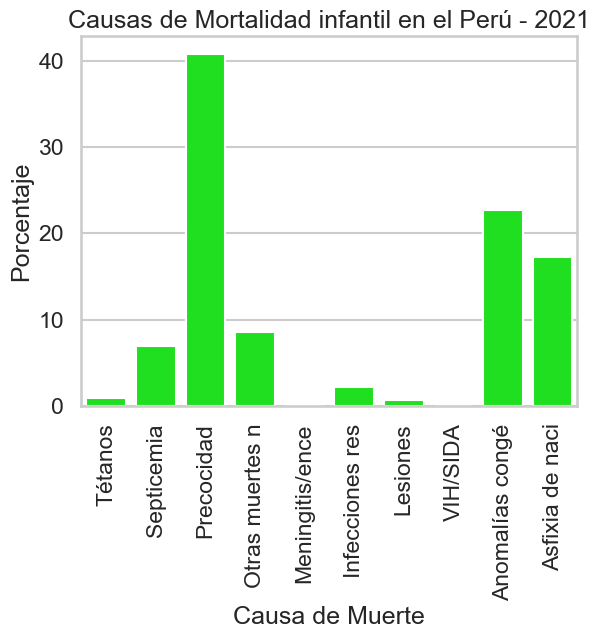

In [76]:
df_c2021['Res'] = df_c2021['Causa de Muerte'].str[:15]
sns.set_context("talk")
sns.set_style("whitegrid")
sns.barplot(data=df_c2021[df_c2021['Estimate']>0], x='Res', y='Estimate', color="lime")
plt.xlabel("Causa de Muerte")
plt.title('Causas de Mortalidad infantil en el Perú - 2021', fontsize=18)
plt.ylabel("Porcentaje")
plt.xticks( rotation=90)

plt.show()

### Año 2020

In [78]:
from googletrans import Translator

# Configura Selenium para usar Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abre la página web
url = "https://childmortality.org/causes-of-death/data/estimates?indicator=MRY0&refArea=PER&sex=_T&age=M0&type=FRACTION&d_refArea=PER&ifex=CAUSE_OF_DEATH&cause=ASPHY_TRAUMA&causes=ASPHY_TRAUMA&causes=MENINGITIS_ENC&causes=PREMATURITY&year=2020"

driver.get(url)
# Espera hasta que la tabla esté disponible (máximo 10 segundos)
wait = WebDriverWait(driver, 20)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

# Extrae el HTML una vez que la tabla está disponible
html = driver.page_source

# Usa BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html, 'html.parser')

# Encuentra la tabla en el HTML
table = soup.find('table', class_='MuiTable-root')

# Extrae los encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extrae las filas de la tabla
rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

df_c2020 = pd.DataFrame(rows, columns=headers) # Crea un DataFrame con los datos obtenidos

driver.quit() # Cierra el navegador

translator = Translator()
# Traducción
df_c2020['Causa de Muerte'] = df_c2020['Cause of death'].apply(lambda x: translator.translate(x, src='en', dest='es').text)
df_c2020['Estimate']=df_c2020['Estimate'].astype("float")
df_c2020

,Cause of death,Estimate,Lower bound,Upper bound,Causa de Muerte
0,Tetanus,0.92,0.66,1.19,Tétanos
1,Sepsis,6.84,3.69,10.83,Septicemia
2,Prematurity,40.89,27.99,60.56,Precocidad
3,Other neonatal deaths,8.68,4.52,16.68,Otras muertes neonatales
4,Meningitis/encephalitis,0.12,0.05,0.21,Meningitis/encefalitis
5,Measles,0.00,0,0.02,Sarampión
6,Malaria,0.00,0,0.02,Malaria
7,Lower respiratory infections,2.18,1.12,3.99,Infecciones respiratorias inferiores
8,Injuries,0.61,0.3,1.01,Lesiones
9,HIV/AIDS,0.01,0,0.02,VIH/SIDA


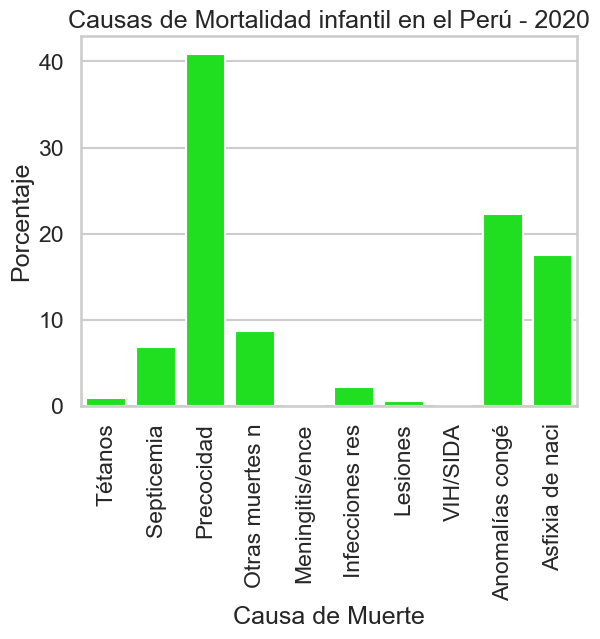

In [79]:
df_c2020['Res'] = df_c2020['Causa de Muerte'].str[:15]
sns.set_context("talk")
sns.set_style("whitegrid")
sns.barplot(data=df_c2020[df_c2020['Estimate']>0], x='Res', y='Estimate', color="lime")
plt.xlabel("Causa de Muerte")
plt.title('Causas de Mortalidad infantil en el Perú - 2020', fontsize=18)
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)

plt.show()

### Año 2019

In [81]:
from googletrans import Translator

# Configura Selenium para usar Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abre la página web
url = "https://childmortality.org/causes-of-death/data/estimates?indicator=MRY0&refArea=PER&sex=_T&age=M0&type=FRACTION&d_refArea=PER&ifex=CAUSE_OF_DEATH&cause=ASPHY_TRAUMA&causes=ASPHY_TRAUMA&causes=MENINGITIS_ENC&causes=PREMATURITY&year=2019"

driver.get(url)
# Espera hasta que la tabla esté disponible (máximo 10 segundos)
wait = WebDriverWait(driver, 25)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

# Extrae el HTML una vez que la tabla está disponible
html = driver.page_source

# Usa BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html, 'html.parser')

# Encuentra la tabla en el HTML
table = soup.find('table', class_='MuiTable-root')

# Extrae los encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extrae las filas de la tabla
rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Crea un DataFrame con los datos obtenidos
df_c2019 = pd.DataFrame(rows, columns=headers)
# Cierra el navegador

driver.quit()

translator = Translator()
# Traducción
df_c2019['Causa de Muerte'] = df_c2019['Cause of death'].apply(lambda x: translator.translate(x, src='en', dest='es').text)
df_c2019['Estimate']=df_c2019['Estimate'].astype("float")
df_c2019

,Cause of death,Estimate,Lower bound,Upper bound,Causa de Muerte
0,Tetanus,0.90,0.63,1.17,Tétanos
1,Sepsis,6.78,4.02,11.17,Septicemia
2,Prematurity,40.75,28.94,57.43,Precocidad
3,Other neonatal deaths,8.33,4.26,15.73,Otras muertes neonatales
4,Meningitis/encephalitis,0.12,0.07,0.2,Meningitis/encefalitis
5,Measles,0.00,0,0.02,Sarampión
6,Malaria,0.00,0,0.02,Malaria
7,Lower respiratory infections,2.20,1.23,3.9,Infecciones respiratorias inferiores
8,Injuries,0.63,0.36,0.94,Lesiones
9,HIV/AIDS,0.01,0,0.02,VIH/SIDA


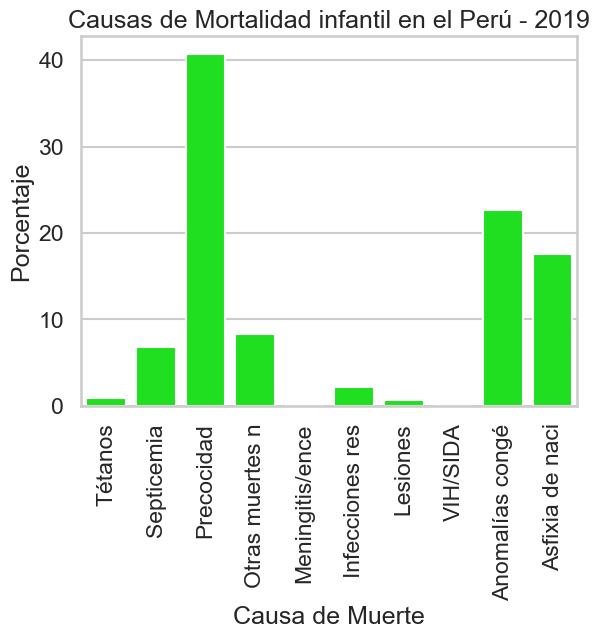

In [82]:
df_c2019['Res'] = df_c2019['Causa de Muerte'].str[:15]
sns.set_context("talk")
sns.set_style("whitegrid")
sns.barplot(data=df_c2019[df_c2019['Estimate']>0], x='Res', y='Estimate', color="lime")
plt.xlabel("Causa de Muerte")
plt.title('Causas de Mortalidad infantil en el Perú - 2019', fontsize=18)
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)

plt.show()

### Año 2018

In [84]:
# Configura Selenium para usar Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abre la página web
url = "https://childmortality.org/causes-of-death/data/estimates?indicator=MRY0&refArea=PER&sex=_T&age=M0&type=FRACTION&d_refArea=PER&ifex=CAUSE_OF_DEATH&cause=ASPHY_TRAUMA&causes=ASPHY_TRAUMA&causes=MENINGITIS_ENC&causes=PREMATURITY&year=2018"

driver.get(url)
# Espera hasta que la tabla esté disponible (máximo 10 segundos)
wait = WebDriverWait(driver, 25)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

# Extrae el HTML una vez que la tabla está disponible
html = driver.page_source

# Usa BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html, 'html.parser')

# Encuentra la tabla en el HTML
table = soup.find('table', class_='MuiTable-root')

# Extrae los encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extrae las filas de la tabla
rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Crea un DataFrame con los datos obtenidos
df_c2018 = pd.DataFrame(rows, columns=headers)
# Cierra el navegador

driver.quit()

translator = Translator()
# Traducción
df_c2018['Causa de Muerte'] = df_c2018['Cause of death'].apply(lambda x: translator.translate(x, src='en', dest='es').text)
df_c2018['Estimate']=df_c2019['Estimate'].astype("float")
df_c2018

,Cause of death,Estimate,Lower bound,Upper bound,Causa de Muerte
0,Tetanus,0.90,0.6,1.18,Tétanos
1,Sepsis,6.78,3.55,11.1,Septicemia
2,Prematurity,40.75,29.48,58.51,Precocidad
3,Other neonatal deaths,8.33,3.39,16.35,Otras muertes neonatales
4,Meningitis/encephalitis,0.12,0.05,0.2,Meningitis/encefalitis
5,Measles,0.00,0,0.02,Sarampión
6,Malaria,0.00,0,0.02,Malaria
7,Lower respiratory infections,2.20,1.25,4.18,Infecciones respiratorias inferiores
8,Injuries,0.63,0.36,0.94,Lesiones
9,HIV/AIDS,0.01,0,0.05,VIH/SIDA


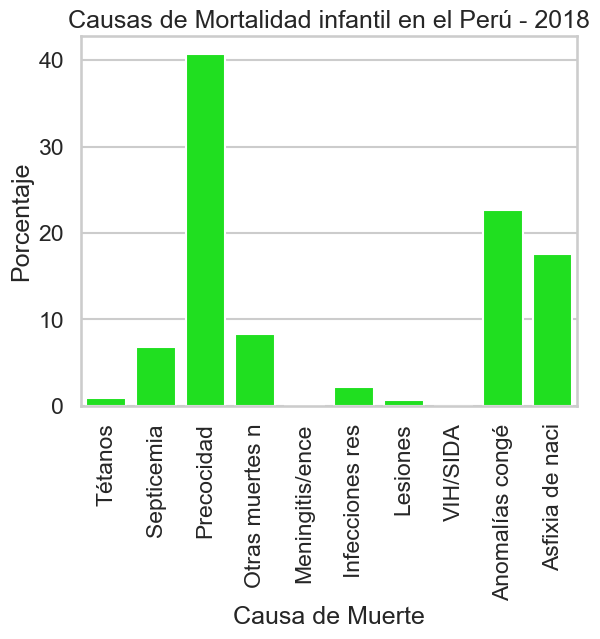

In [85]:
df_c2018['Res'] = df_c2018['Causa de Muerte'].str[:15]
sns.set_context("talk")
sns.set_style("whitegrid")
sns.barplot(data=df_c2018[df_c2018['Estimate']>0], x='Res', y='Estimate', color="lime")
plt.xlabel("Causa de Muerte")
plt.title('Causas de Mortalidad infantil en el Perú - 2018', fontsize=18)
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)

plt.show()

### Año 2017

In [87]:
# Configura Selenium para usar Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abre la página web
url = "https://childmortality.org/causes-of-death/data/estimates?indicator=MRY0&refArea=PER&sex=_T&age=M0&type=FRACTION&d_refArea=PER&ifex=CAUSE_OF_DEATH&cause=ASPHY_TRAUMA&causes=ASPHY_TRAUMA&causes=MENINGITIS_ENC&causes=PREMATURITY&year=2017"

driver.get(url)
# Espera hasta que la tabla esté disponible (máximo 10 segundos)
wait = WebDriverWait(driver, 15)
table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "MuiTable-root")))

# Extrae el HTML una vez que la tabla está disponible
html = driver.page_source

# Usa BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html, 'html.parser')

# Encuentra la tabla en el HTML
table = soup.find('table', class_='MuiTable-root')

# Extrae los encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extrae las filas de la tabla
rows = []
for row in table.find_all('tr')[1:]:  # Excluir el encabezado
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Crea un DataFrame con los datos obtenidos
df_c2017 = pd.DataFrame(rows, columns=headers)
# Cierra el navegador

driver.quit()

translator = Translator()
# Traducción
df_c2017['Causa de Muerte'] = df_c2017['Cause of death'].apply(lambda x: translator.translate(x, src='en', dest='es').text)
df_c2017['Estimate']=df_c2017['Estimate'].astype("float")
df_c2017

,Cause of death,Estimate,Lower bound,Upper bound,Causa de Muerte
0,Tetanus,0.88,0.64,1.17,Tétanos
1,Sepsis,6.66,3.5,10.68,Septicemia
2,Prematurity,41.75,30.12,58.26,Precocidad
3,Other neonatal deaths,8.45,3.32,15.92,Otras muertes neonatales
4,Meningitis/encephalitis,0.11,0.04,0.2,Meningitis/encefalitis
5,Measles,0.00,0,0.02,Sarampión
6,Malaria,0.00,0,0.02,Malaria
7,Lower respiratory infections,2.15,1.25,4.02,Infecciones respiratorias inferiores
8,Injuries,0.63,0.33,0.9,Lesiones
9,HIV/AIDS,0.01,0,0.02,VIH/SIDA


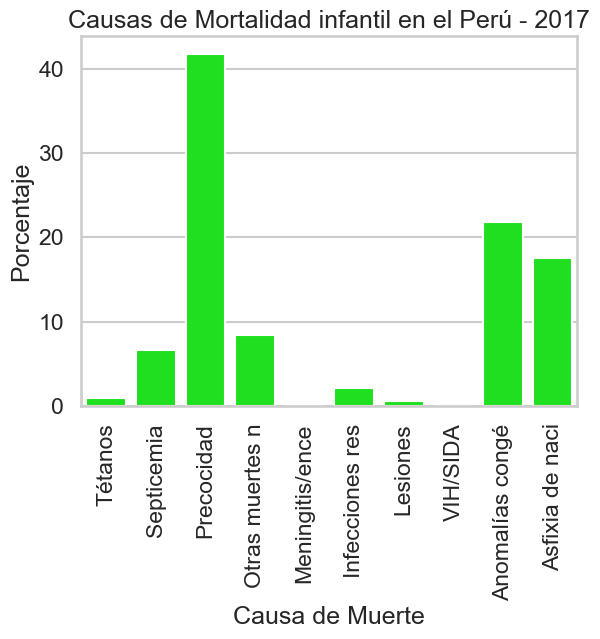

In [88]:
df_c2017['Res'] = df_c2017['Causa de Muerte'].str[:15]
sns.set_context("talk")
sns.set_style("whitegrid")
sns.barplot(data=df_c2017[df_c2017['Estimate']>0], x='Res', y='Estimate', color="lime")
plt.xlabel("Causa de Muerte")
plt.title('Causas de Mortalidad infantil en el Perú - 2017', fontsize=18)
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)

plt.show()

### Agrupados 2017 - 2021

In [90]:
df_c2017.loc[:,'Año']=2017
df_c2018.loc[:,'Año']=2018
df_c2019.loc[:,'Año']=2019
df_c2020.loc[:,'Año']=2020
df_c2021.loc[:,'Año']=2021

df_ct=pd.concat([df_c2017,df_c2018,df_c2019,df_c2020,df_c2021])
df_ct

,Cause of death,Estimate,Lower bound,Upper bound,Causa de Muerte,Res,Año
0,Tetanus,0.88,0.64,1.17,Tétanos,Tétanos,2017
1,Sepsis,6.66,3.5,10.68,Septicemia,Septicemia,2017
2,Prematurity,41.75,30.12,58.26,Precocidad,Precocidad,2017
3,Other neonatal deaths,8.45,3.32,15.92,Otras muertes neonatales,Otras muertes n,2017
4,Meningitis/encephalitis,0.11,0.04,0.2,Meningitis/encefalitis,Meningitis/ence,2017
...,...,...,...,...,...,...,...
8,Injuries,0.62,0.35,0.99,Lesiones,Lesiones,2021
9,HIV/AIDS,0.02,0,0.02,VIH/SIDA,VIH/SIDA,2021
10,Diarrhea,0.00,0,0.02,Diarrea,Diarrea,2021
11,Congenital anomalies,22.65,13.77,37.78,Anomalías congénitas,Anomalías congé,2021


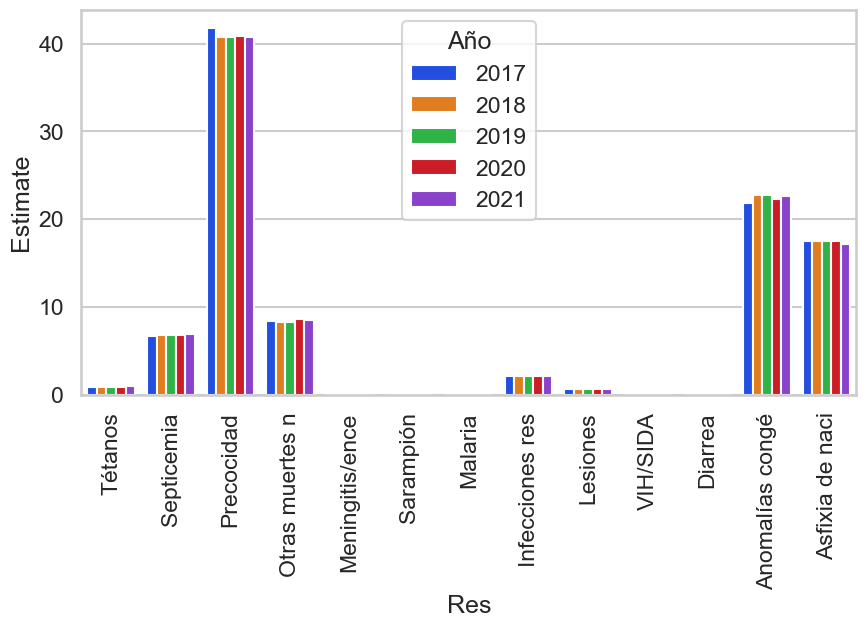

In [91]:
plt.figure(figsize=(10, 5)) 
sns.barplot(data=df_ct,x="Res",y="Estimate",hue="Año", palette="bright")
plt.xticks(rotation=90)
plt.savefig("grafico.png", format='png')
plt.show()